In [1]:
!pip install spotipy
!pip install pandas
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 5.7 MB/s eta 0:00:00


In [2]:
!pip install seaborn
!pip install plotly

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

## Paso 1: Acceder a la API de Spotify

In [4]:
client_id = "506f1f00f0df4dd39389c923f8e5eecb"
client_secret = "6d608506ed814b71b9be57d3da2fe717"

# Authentication - sin user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Paso 2: Obtener canciones (tracks) y artistas

#### Paso 2.1: Obtener información de las canciones (tracks)

In [5]:
nombre_artista = []
id_artista = []
nombre_cancion = []
id_cancion = []
popularidad_cancion = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, c in enumerate(track_results['tracks']['items']):
        nombre_artista.append(c['artists'][0]['name'])
        id_artista.append(c['artists'][0]['id'])
        nombre_cancion.append(c['name'])
        id_cancion.append(c['id'])
        popularidad_cancion.append(c['popularity'])

In [6]:
track_df = pd.DataFrame({'nombre_artista':nombre_artista, 'nombre_cancion':nombre_cancion, 'id_cancion':id_cancion, 'popularidad_cancion':popularidad_cancion, 'id_artista':id_artista})
print(track_df.shape)
track_df.head()

(1000, 5)


,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista
0,Phaze Minor,IM ON TOP FINAL,6SDDGhO3inhvnRanbVe3Ik,0,6KBhr9H8FY8iMOI1dakwmi
1,DJ Gangster,Slow Down,5yaNbakGlGxbvMIfWhQR71,0,3s4D3gc6QczVSnAyt72BYM
2,Cafe Jazz Coffee House,Divine Stress Relieving,2Km7prX1vSvj9jcuXrvBRR,0,0tqf0Lu3eLo57sc23MVXUQ
3,Avslappning Sound,Garden Relaxation,3CQecdzCHmLiTm7HU0NTyI,0,68MQkEARDjbM0nc4ijFkoa
4,Música para Cocinar Ambiente,Terrific Music for Coffee Cacophany,3AudRNHK2QioQXBm965Pll,0,1mMFlKrDT4dishKaegtypH


#### Paso 2.2: Agregar información sobre los artistas que interpretan las canciones (tracks)

In [7]:
popularidad_artista = []
generos_artista = []
seguidores_artista = []
for id_a in track_df.id_artista:
  artista = sp.artist(id_a)
  popularidad_artista.append(artista['popularity'])
  generos_artista.append(artista['genres'])
  seguidores_artista.append(artista['followers']['total'])

In [8]:
track_df = track_df.assign(popularidad_artista=popularidad_artista, generos_artista=generos_artista, seguidores_artista=seguidores_artista)
track_df.head()

,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista,popularidad_artista,generos_artista,seguidores_artista
0,Phaze Minor,IM ON TOP FINAL,6SDDGhO3inhvnRanbVe3Ik,0,6KBhr9H8FY8iMOI1dakwmi,0,[],70
1,DJ Gangster,Slow Down,5yaNbakGlGxbvMIfWhQR71,0,3s4D3gc6QczVSnAyt72BYM,1,[],58
2,Cafe Jazz Coffee House,Divine Stress Relieving,2Km7prX1vSvj9jcuXrvBRR,0,0tqf0Lu3eLo57sc23MVXUQ,0,[],0
3,Avslappning Sound,Garden Relaxation,3CQecdzCHmLiTm7HU0NTyI,0,68MQkEARDjbM0nc4ijFkoa,39,[sleep],4565
4,Música para Cocinar Ambiente,Terrific Music for Coffee Cacophany,3AudRNHK2QioQXBm965Pll,0,1mMFlKrDT4dishKaegtypH,0,[],29


## Paso 3: Obtener variables numéricas de las canciones (tracks)

In [9]:
variables_cancion = []
for id_c in track_df['id_cancion']:
  af = sp.audio_features(id_c)
  variables_cancion.append(af)

In [10]:
print(variables_cancion[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [11]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [12]:
for variables in variables_cancion:
  for var in variables:
    tf_df = tf_df.append(var, ignore_index=True)

<ipython-input-12-49ebb1cfd907>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-12-49ebb1cfd907>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-12-49ebb1cfd907>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-12-49ebb1cfd907>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-12-49ebb1cfd907>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-12-49ebb1cfd907>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [13]:
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.810,0.9470,2,-5.536,0,0.0753,0.0434,0.000003,0.129,0.6520,134.012,audio_features,6SDDGhO3inhvnRanbVe3Ik,spotify:track:6SDDGhO3inhvnRanbVe3Ik,https://api.spotify.com/v1/tracks/6SDDGhO3inhv...,https://api.spotify.com/v1/audio-analysis/6SDD...,100299,4
1,0.849,0.4730,9,-11.632,0,0.4980,0.6760,0.000007,0.254,0.4030,130.007,audio_features,5yaNbakGlGxbvMIfWhQR71,spotify:track:5yaNbakGlGxbvMIfWhQR71,https://api.spotify.com/v1/tracks/5yaNbakGlGxb...,https://api.spotify.com/v1/audio-analysis/5yaN...,195650,4
2,0.627,0.2880,8,-15.093,1,0.0397,0.7370,0.232000,0.178,0.5110,118.876,audio_features,2Km7prX1vSvj9jcuXrvBRR,spotify:track:2Km7prX1vSvj9jcuXrvBRR,https://api.spotify.com/v1/tracks/2Km7prX1vSvj...,https://api.spotify.com/v1/audio-analysis/2Km7...,114958,3
3,0.275,0.2100,2,-18.356,1,0.0336,0.6820,0.901000,0.107,0.0358,60.060,audio_features,3CQecdzCHmLiTm7HU0NTyI,spotify:track:3CQecdzCHmLiTm7HU0NTyI,https://api.spotify.com/v1/tracks/3CQecdzCHmLi...,https://api.spotify.com/v1/audio-analysis/3CQe...,120000,4
4,0.340,0.0634,5,-17.274,0,0.0415,0.9400,0.821000,0.160,0.1850,82.078,audio_features,3AudRNHK2QioQXBm965Pll,spotify:track:3AudRNHK2QioQXBm965Pll,https://api.spotify.com/v1/tracks/3AudRNHK2Qio...,https://api.spotify.com/v1/audio-analysis/3Aud...,132075,4


In [14]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df = tf_df.drop(columns=['key','mode','type', 'uri','track_href','analysis_url'])
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   object
 1   nombre_cancion       1000 non-null   object
 2   id_cancion           1000 non-null   object
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   object
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      986 non-null    float64
 1   energy            986 non-null    float64
 2   loudness          986 non-null    float64
 3   spee

In [15]:
track_df['nombre_artista'] = track_df['nombre_artista'].astype("string")
track_df['nombre_cancion'] = track_df['nombre_cancion'].astype("string")
track_df['id_cancion'] = track_df['id_cancion'].astype("string")
track_df['id_artista'] = track_df['id_artista'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   string
 1   nombre_cancion       1000 non-null   string
 2   id_cancion           1000 non-null   string
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   string
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      986 non-null    float64 
 1   energy            986 non-null    float64 
 2   loudness          986 non-null    fl

## Paso 4: Obtener las canciones, artistas y géneros más populares

#### Paso 4.1: Obtener canciones más populares

In [16]:
top_canciones = track_df.sort_values(by=['popularidad_cancion'], ascending=False)[['nombre_cancion', 'nombre_artista', 'popularidad_cancion']].head(20)
top_canciones.index = np.arange(1, len(top_canciones)+1)
top_canciones

,nombre_cancion,nombre_artista,popularidad_cancion
1,なんでもないよ、,Macaroni Empitsu,74
2,Vulgaire,Werenoi,72
3,Os Sonhos de Deus,Gabriela Rocha,70
4,اليوم الحلو ده,Ahmed Saad,64
5,STOR MAND (feat. Andreas Odbjerg),Tobias Rahim,61
6,Bryła (Club Edit),Kronkel Dom,59
7,Stroj,Peter Pann,53
8,Konečná,CA$HANOVA BULHAR,51
9,Drama,Trap19 Connection,39
10,Kur ir mana cilts?,Būū,36


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12418 (\N{HIRAGANA LETTER MO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 1228

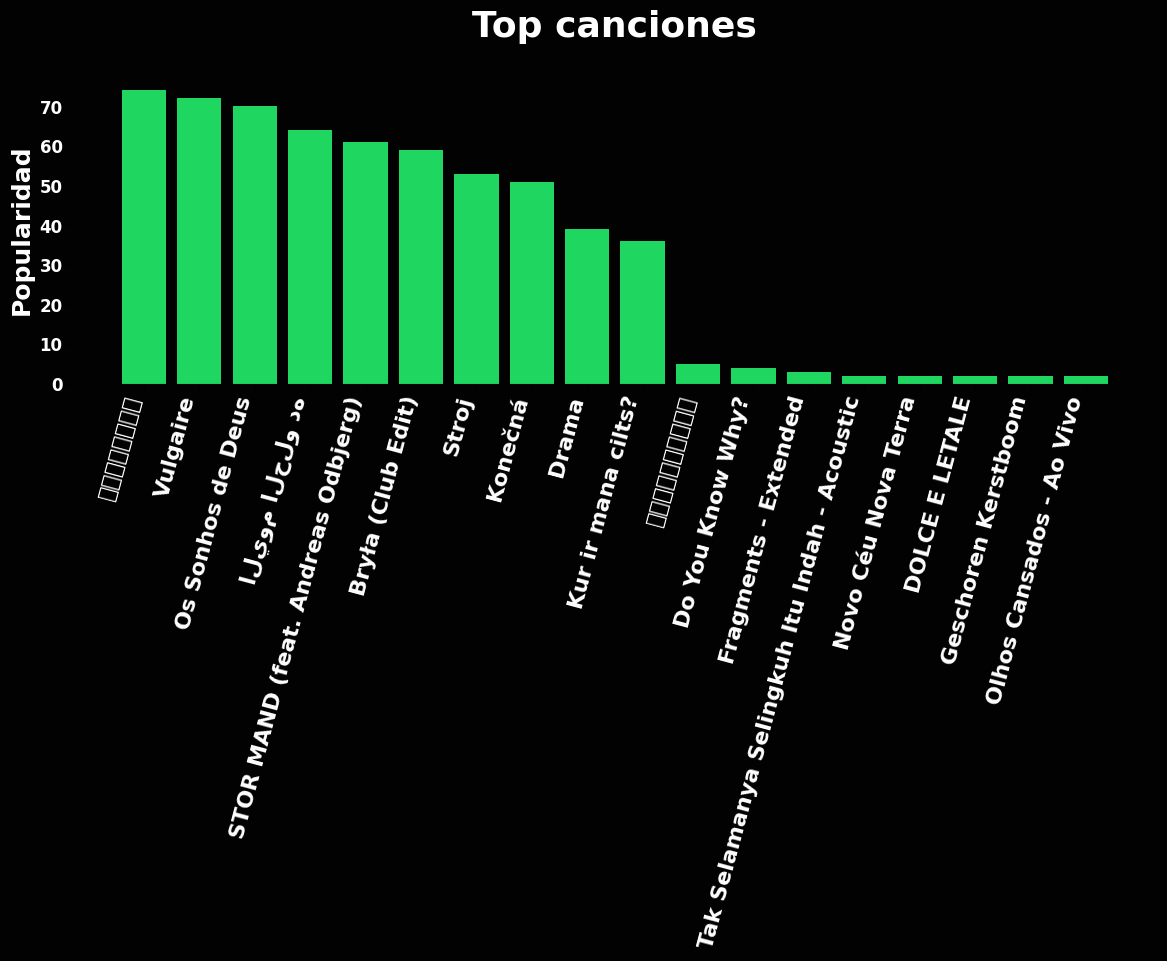

In [17]:
plt.figure(figsize=(14,4), facecolor='#020202')
ax = plt.axes()
ax.bar(top_canciones['nombre_cancion'], top_canciones['popularidad_cancion'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top canciones", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

#### Paso 4.2: Obtener artistas más populares según número de seguidores

In [18]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['seguidores_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['seguidores_artista'] = top_artistas['seguidores_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Gabriela Rocha,6150265,70,"['adoracao', 'brazilian gospel']"
2,Ludwig van Beethoven,5124274,71,"['classical', 'classical era', 'early romantic..."
3,Ahmed Saad,4381084,59,"['arab pop', 'egyptian pop', 'shaabi']"
4,Macaroni Empitsu,1241920,64,"['anime', 'j-pop', 'japanese alternative rock'..."
5,Werenoi,733283,78,"['french hip hop', 'pop urbaine']"
6,Camille Saint-Saëns,369126,64,"['classical', 'french romanticism', 'late roma..."
7,Gaman Santhal,344500,44,['gujarati garba']
8,Musica Relajante,188361,48,"['musica de fondo', 'sleep']"
9,CA$HANOVA BULHAR,144071,55,"['czech drill', 'czech hip hop', 'czsk hip hop']"
10,Relaxing Music Therapy,114716,56,['sleep']


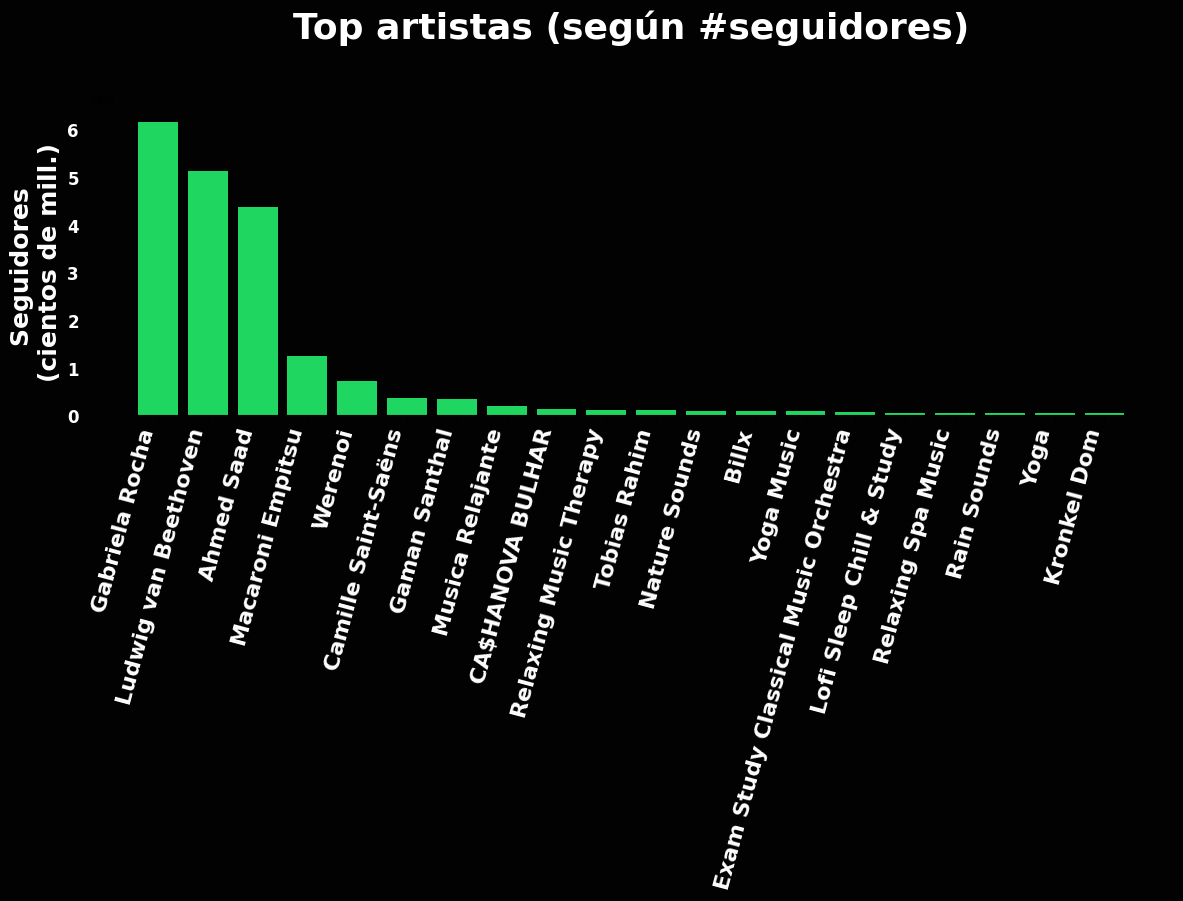

In [19]:
plt.figure(figsize=(14,4), facecolor='#020202')
ax = plt.axes()
ax.bar(top_artistas['nombre_artista'], top_artistas['seguidores_artista'], color='#1ED660')
ax.set_ylabel("Seguidores \n(cientos de mill.)", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según #seguidores)", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

#### Paso 4.3: Obtener artistas más populares según popularidad

In [20]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['popularidad_artista'] = top_artistas['popularidad_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Rain Sounds,58379,79,"['environmental', 'sleep', 'sound', 'water']"
2,Werenoi,733283,78,"['french hip hop', 'pop urbaine']"
3,White Noise Baby Sleep,35105,71,['sleep']
4,Ludwig van Beethoven,5124274,71,"['classical', 'classical era', 'early romantic..."
5,Gabriela Rocha,6150265,70,"['adoracao', 'brazilian gospel']"
6,Macaroni Empitsu,1241920,64,"['anime', 'j-pop', 'japanese alternative rock'..."
7,Camille Saint-Saëns,369126,64,"['classical', 'french romanticism', 'late roma..."
8,Baby Lullaby Academy,9073,63,['lullaby']
9,Nature Sounds,100599,63,"['environmental', 'sleep', 'water']"
10,Spiritual Moment,10700,61,['tone']


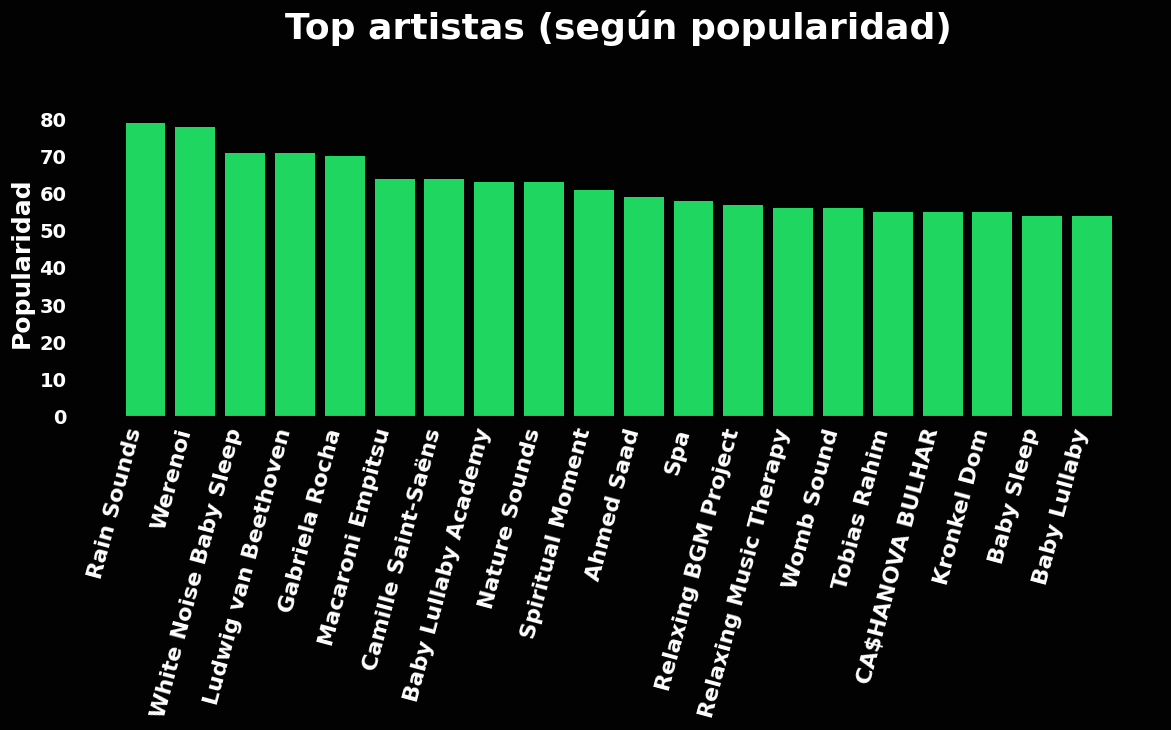

In [21]:
plt.figure(figsize=(14,4), facecolor='#020202')
ax = plt.axes()
ax.bar(top_artistas['nombre_artista'], top_artistas['popularidad_artista'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según popularidad)", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

#### Paso 4.4: Obtener los géneros más populares

In [22]:
top_generos = pd.Series([x for _list in track_df['generos_artista'] for x in _list]).value_counts().head(20).to_frame().reset_index()
top_generos = top_generos.rename(columns = {'index':'generos', 0:'frecuencia'})
top_generos.index = np.arange(1, len(top_generos)+1)
top_generos

,generos,frecuencia
1,sleep,83
2,environmental,34
3,pet calming,21
4,sound,20
5,water,17
6,dinner jazz,14
7,musica de fondo,13
8,pianissimo,9
9,lullaby,8
10,lo-fi product,6


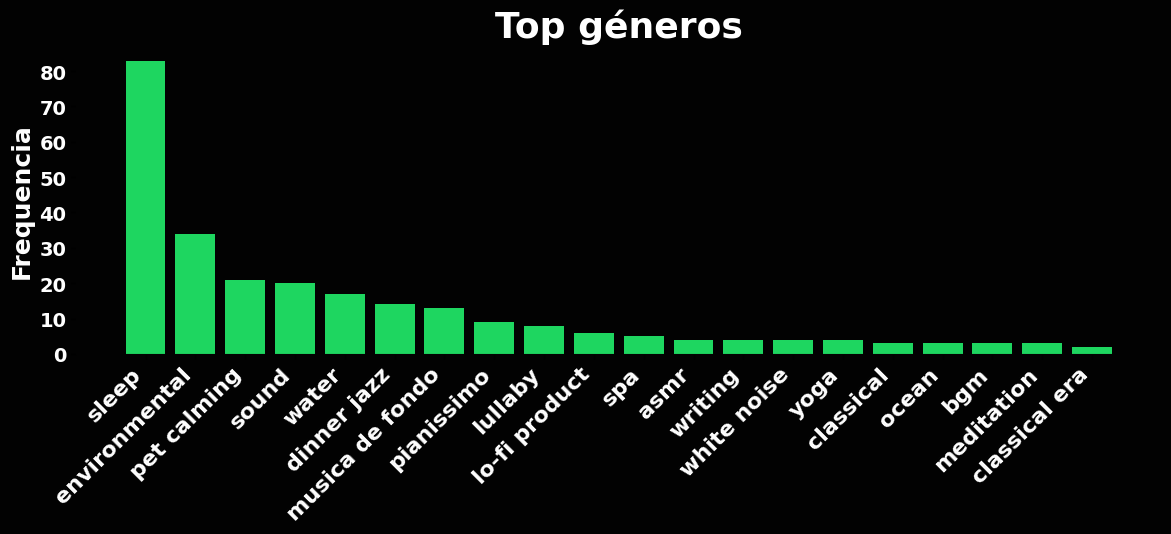

In [23]:
plt.figure(figsize=(14,4), facecolor='#020202')
ax = plt.axes()
ax.bar(top_generos['generos'], top_generos['frecuencia'], color='#1ED660')
ax.set_ylabel("Frequencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

## Paso 5: Obtener artistas y canciones más populares (por seguidores) por género más popular

#### Paso 5.1: Obtener artistas más populares (por seguidores) por género más popular

In [24]:
by_artista_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'],ascending=False)[['popularidad_artista','nombre_artista','generos_artista','id_artista']])
by_artista_pop.astype(str).drop_duplicates().head(20)
by_artista_pop
top_artistas_por_genero = []
for genero in top_generos['generos'].to_list():
  for index, row in by_artista_pop.iterrows():
    if genero in row['generos_artista']:
      top_artistas_por_genero.append({'nombre_artista':row['nombre_artista'], 'popularidad_artista':row['popularidad_artista'],'generos':genero})
      break
top_artistas_por_genero = pd.json_normalize(top_artistas_por_genero)
top_artistas_por_genero = top_artistas_por_genero.merge(top_generos, on='generos', how='left')
top_artistas_por_genero

,nombre_artista,popularidad_artista,generos,frecuencia
0,Rain Sounds,79,sleep,83
1,Rain Sounds,79,environmental,34
2,Dog Calming Music,47,pet calming,21
3,Rain Sounds,79,sound,20
4,Rain Sounds,79,water,17
5,Coffee Shop Jazz Relax,40,dinner jazz,14
6,Musica Relajante,48,musica de fondo,13
7,Classical New Age Piano Music,29,pianissimo,9
8,Baby Lullaby Academy,63,lullaby,8
9,Lofi Sleep Chill & Study,51,lo-fi product,6


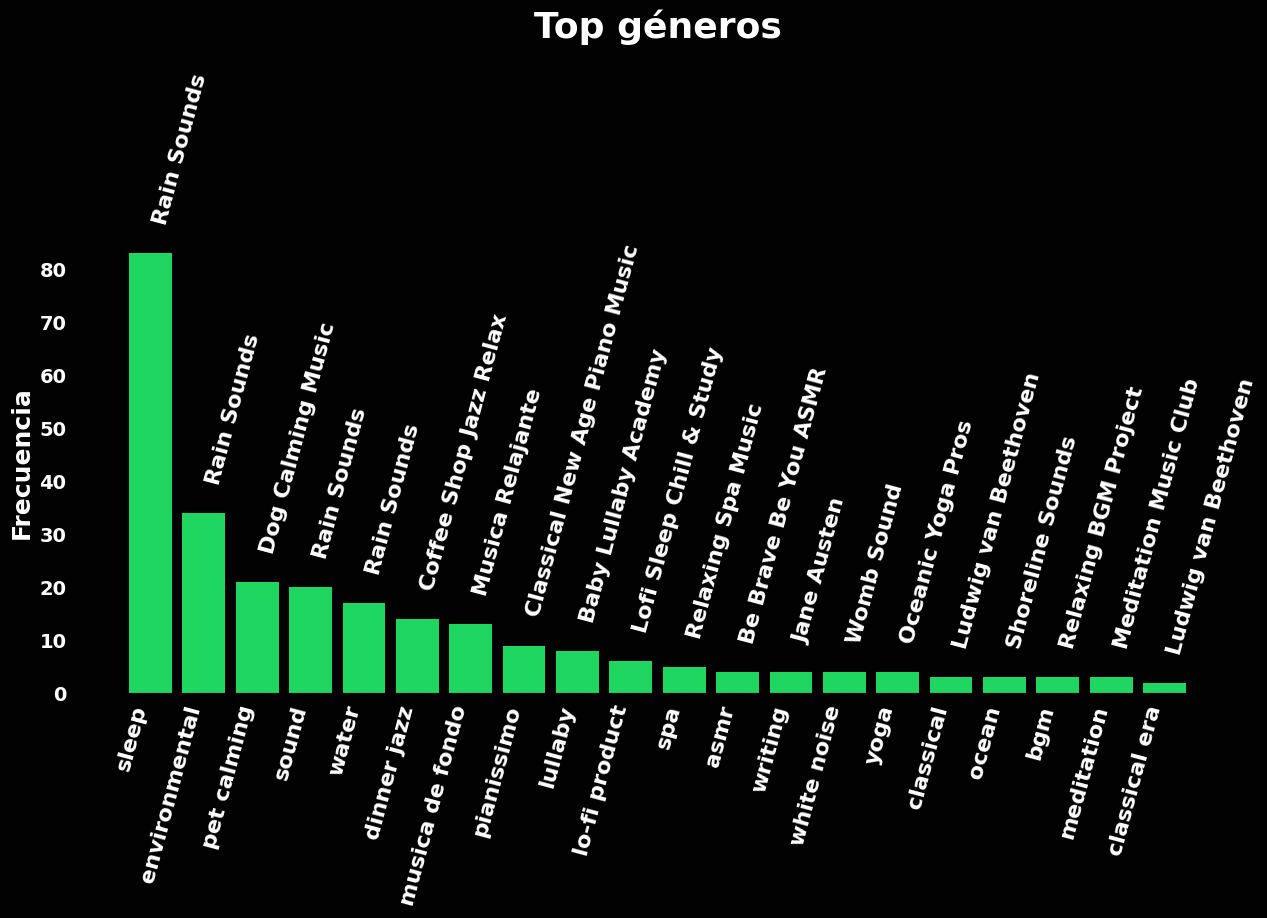

In [25]:
plt.figure(figsize=(15,6), facecolor='#020202')
ax = plt.axes()
ax.bar(top_artistas_por_genero['generos'], top_artistas_por_genero['frecuencia'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.4)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_artistas_por_genero['nombre_artista'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Open Sans', color='white', size=16, rotation=75, weight='bold')
plt.show()

#### Paso 5.2: Obtener canciones más populares (por seguidores) por género más popular

In [26]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_cancion'],ascending=False)[['popularidad_cancion','nombre_cancion','nombre_artista','generos_artista','id_cancion']])
top_canciones_por_genero = []
for genre in top_generos['generos'].to_list():
  for index, row in by_track_pop.iterrows():
    if genre in row['generos_artista']:
      top_canciones_por_genero.append({'nombre_cancion':row['nombre_cancion'], 'popularidad_cancion':row['popularidad_cancion'], 'generos':genre})
      break
top_canciones_por_genero = pd.json_normalize(top_canciones_por_genero)
top_canciones_por_genero = top_canciones_por_genero.merge(top_generos, on='generos', how='left')
top_canciones_por_genero

,nombre_cancion,popularidad_cancion,generos,frecuencia
0,Rise of the Sun,0,sleep,83
1,Soft Caress,0,environmental,34
2,Joyful Electric and Acoustic Piano - Vibe for ...,0,pet calming,21
3,Soft Caress,0,sound,20
4,Soft Caress,0,water,17
5,Sunny Low Key Dreams,0,dinner jazz,14
6,Happy River Birds,0,musica de fondo,13
7,Feelings of Connection,0,pianissimo,9
8,Straight To Sleep,0,lullaby,8
9,So Chill,0,lo-fi product,6


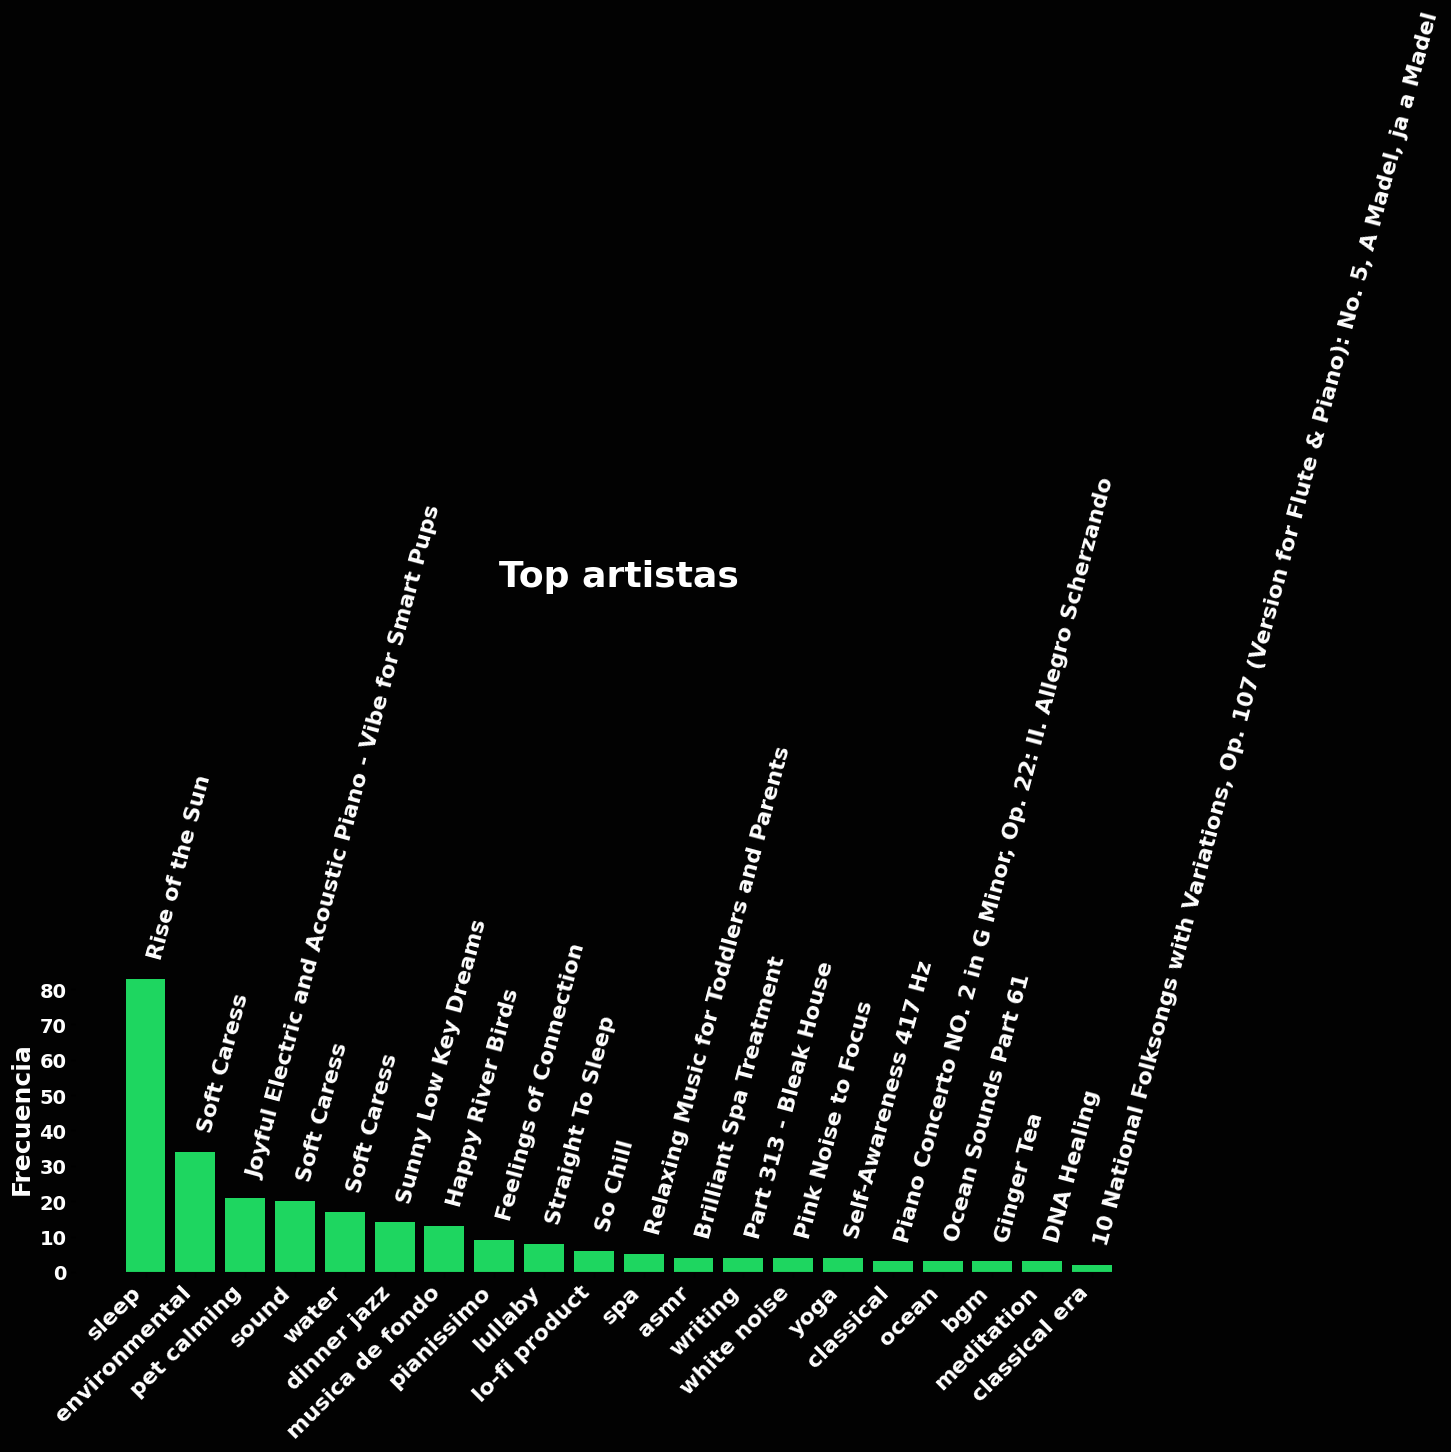

In [27]:
plt.figure(figsize=(14,4), facecolor='#020202')
ax = plt.axes()
ax.bar(top_canciones_por_genero['generos'], top_canciones_por_genero['frecuencia'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=2.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_canciones_por_genero['nombre_cancion'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Open Sans', color='white', size=16, rotation=75, weight='bold')

plt.show()

In [32]:
fig = go.Figure(data=[go.Scatterpolar(r=mean_vals.iloc[0], theta=var_canc_cols, fill='toself', name='Top 100', line_color='#FFFFFF', fillcolor='rgba(255,255,255,0.9)'),
                      go.Scatterpolar(r=mean_vals.iloc[1], theta=var_canc_cols, fill='toself', name='Todas', line_color='rgb(30,214,96)', fillcolor='rgba(30,214,96,0.7)')],
                layout=go.Layout(title=go.layout.Title(text='Comparación de características'),
                                 polar={'radialaxis': {'visible': True}},
                                 showlegend=True, plot_bgcolor='#020202', paper_bgcolor='#020202'))
fig.update_layout(title=dict(text='Comparación de características',
                             font=dict(family="sans-serif",
                                       size = 18,
                                       color='#FFFFFF')),
                 legend=dict(font=dict(size=20, color='#FFFFFF')))
fig.update_xaxes(title_font_color='#FFFFFF')
fig.update_yaxes(title_font_color='#FFFFFF')
fig.update_polars(angularaxis_color='#FFFFFF', angularaxis_tickfont_size=20, angularaxis_linecolor='#1ED660', angularaxis_linewidth=2, angularaxis_gridcolor='#1ED660', angularaxis_tickcolor='#1DB954',
                 bgcolor='rgba(25,20,20,1)', radialaxis_gridcolor='#1ED660')
fig.show()